# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-26 09:45:58--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.002s  

2022-11-26 09:45:58 (34.3 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
1,154,89,40,79,154,64,9,144,46,19,139,168,311,149,71,8,7,188,197
2,713,107,53,108,211,63,11,219,31,25,168,228,704,198,69,10,21,190,203
3,678,86,45,70,122,56,7,148,45,19,144,170,324,186,84,9,5,180,183
4,14,94,49,79,203,71,5,174,37,21,154,196,465,206,71,6,2,197,199
5,660,88,35,60,143,59,7,128,52,18,129,147,246,109,62,1,6,202,209
6,597,88,42,66,133,57,6,123,54,17,144,147,227,160,66,8,4,193,198
7,211,86,37,69,150,63,8,138,48,18,134,163,284,124,71,1,6,189,195
8,158,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196
9,535,98,44,88,176,67,10,158,43,20,149,173,367,154,66,14,9,194,202


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.112933,93.655738,44.816029,82.140255,169.759563,61.887067,8.555556,169.021858,40.859745,20.599271,147.843352,188.994536,440.766849,174.582878,72.524590,6.171220,12.486339,188.865209,195.504554
std,245.464163,8.104916,6.139857,15.857037,34.131889,7.846497,4.765209,32.919658,7.786639,2.564439,14.339505,30.970170,174.956398,32.614578,7.271698,4.788579,8.728587,6.046961,7.355077
min,1.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,206.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,150.000000,68.000000,2.000000,6.000000,185.000000,190.000000
50%,418.000000,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,628.000000,100.000000,49.000000,98.000000,197.000000,66.000000,10.000000,199.000000,46.000000,23.000000,158.000000,216.000000,589.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,116.000000,58.000000,110.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,182.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler

# отнормируем данные вычтя из них среднее и поделив на дисперсию. Это нужно сделать, чтобы в дальнейшем можно было использовать PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
np.unique(y_train)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# перекодируем наши метки в числовой вид
le_encoder = LabelEncoder()
y_train_le = le_encoder.fit_transform(y_train)
y_test_le = le_encoder.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.base import clone

def kfold(X, y, k_folds, model):
  size = X.shape[0]
  window = int(size / k_folds)
  idx = np.arange(size)
  scores = {'test_accuracy': [], 'test_f1_weighted': []}
  for i in range(k_folds):
    clone_model = clone(model)
    if i != k_folds-1:
      cv_idx = idx[i*window:(i+1)*window]
    else:
      cv_idx = idx[i*window:]

    X_train_cv = X[np.delete(idx, cv_idx)]
    X_test_cv = X[cv_idx]
    y_train_cv = y[np.delete(idx, cv_idx)]
    y_test_cv = y[cv_idx]
    clone_model.fit(X_train_cv, y_train_cv)
    predict = clone_model.predict(X_test_cv)
    acc = accuracy_score(y_test_cv, predict)
    f1 = f1_score(y_test_cv, predict, average='weighted')
    scores['test_accuracy'].append(acc)
    scores['test_f1_weighted'].append(f1)
  return scores

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score

penaltys = ['l1', 'l2']
Cs = np.linspace(0.1, 1, 10)

best_params = {}

best_accuracy = 0
best_f1 = 0


for penalty in penaltys:
  for C in Cs:
    logreg = LogisticRegression(penalty=penalty,
                                C=C,  
                                multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
    # cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # scores = cross_validate(logreg, X_train_scaled, y_train_le, scoring=['accuracy', 'f1_weighted'], cv=cv, n_jobs=-1)
    scores = kfold(X_train_scaled, y_train, 10, logreg)
    acc = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1_weighted'])
    if best_accuracy <= acc and best_f1 <= f1:
      best_accuracy = acc
      best_f1 = f1
      best_params = {'C': C, 'penalty': penalty, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 1e-3, 'max_iter': 500}
      print(f"Update paramenets. New Best Accuracy: {acc} and F1 score: {f1}")

Update paramenets. New Best Accuracy: 0.6970899470899471 and F1 score: 0.6792485639181256
Update paramenets. New Best Accuracy: 0.7240740740740741 and F1 score: 0.7112893937590347
Update paramenets. New Best Accuracy: 0.7441798941798942 and F1 score: 0.7341259258295525
Update paramenets. New Best Accuracy: 0.7537037037037038 and F1 score: 0.7444733388890159
Update paramenets. New Best Accuracy: 0.7592592592592593 and F1 score: 0.7513483138996294
Update paramenets. New Best Accuracy: 0.762962962962963 and F1 score: 0.755887625142833
Update paramenets. New Best Accuracy: 0.774074074074074 and F1 score: 0.7670215481765768
Update paramenets. New Best Accuracy: 0.7796296296296297 and F1 score: 0.7734740239024653


In [ ]:
best_params

{'C': 0.8,
 'penalty': 'l1',
 'multi_class': 'multinomial',
 'solver': 'saga',
 'tol': 0.001,
 'max_iter': 500}

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


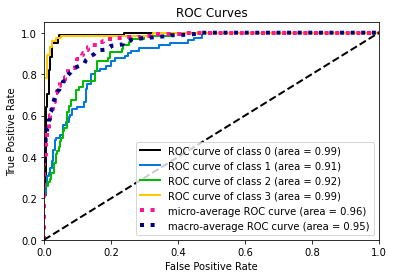

In [ ]:
import scikitplot

logreg = LogisticRegression(**best_params)
logreg.fit(X_train_scaled, y_train_le)

predicted_proba = logreg.predict_proba(X_test_scaled)

scikitplot.metrics.plot_roc(y_test_le, predicted_proba);

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

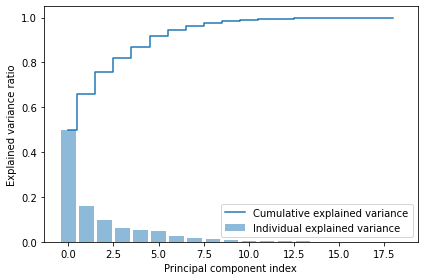

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA()
pca.fit(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
exp_var_pca.cumsum()

array([0.49836134, 0.65879992, 0.75692661, 0.81782328, 0.87024751,
       0.91852177, 0.94582328, 0.96434986, 0.97660594, 0.985047  ,
       0.98999825, 0.99294596, 0.99540296, 0.99712132, 0.99811947,
       0.99899541, 0.9996552 , 0.99998114, 1.        ])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
# Нормализовывать данные нужно обязательно (!!!), т.к. из-за большой шкалы измерения признака мы получим большую дисперсию, а метод главных компонент отображает признак с меньшей дисперсией на признак с большей
# Количество компонент выбираем равным 12, т.к. по графику кумулятивной суммы видно, что наблюдается небольшой прирост
n_pca = 12
pca = PCA(n_pca)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
penaltys = ['l1', 'l2']
Cs = np.linspace(0.1, 1, 10)

best_params_logreg = {}

best_accuracy = 0
best_f1 = 0


for penalty in penaltys:
  for C in Cs:
    logreg = LogisticRegression(penalty=penalty,
                                C=C,  
                                multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
    # cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # scores = cross_validate(logreg, X_train_pca, y_train_le, scoring=['accuracy', 'f1_weighted'], cv=cv, n_jobs=-1)
    scores = kfold(X_train_scaled, y_train, 10, logreg)
    acc = np.mean(scores['test_accuracy'])
    f1 = np.mean(scores['test_f1_weighted'])
    if best_accuracy <= acc and best_f1 <= f1:
      best_accuracy = acc
      best_f1 = f1
      best_params_logreg = {'C': C, 'penalty': penalty, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 1e-3, 'max_iter': 500}
      print(f"Update paramenets. New Best Accuracy: {acc} and F1 score: {f1}")

Update paramenets. New Best Accuracy: 0.6970899470899471 and F1 score: 0.6792485639181256
Update paramenets. New Best Accuracy: 0.7240740740740741 and F1 score: 0.7112893937590347
Update paramenets. New Best Accuracy: 0.7441798941798942 and F1 score: 0.7341259258295525
Update paramenets. New Best Accuracy: 0.7537037037037038 and F1 score: 0.7444733388890159
Update paramenets. New Best Accuracy: 0.7592592592592593 and F1 score: 0.7513483138996294
Update paramenets. New Best Accuracy: 0.762962962962963 and F1 score: 0.7561195858820401
Update paramenets. New Best Accuracy: 0.774074074074074 and F1 score: 0.7670215481765768
Update paramenets. New Best Accuracy: 0.7796296296296297 and F1 score: 0.7732420631632582


In [ ]:
best_params_logreg

{'C': 0.8,
 'penalty': 'l1',
 'multi_class': 'multinomial',
 'solver': 'saga',
 'tol': 0.001,
 'max_iter': 500}

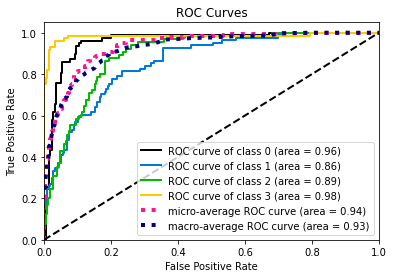

In [ ]:
logreg = LogisticRegression(**best_params_logreg)
logreg.fit(X_train_pca, y_train_le)

predicted_proba = logreg.predict_proba(X_test_pca)

scikitplot.metrics.plot_roc(y_test_le, predicted_proba);

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depths = np.arange(3, 26)
best_params_tree = {}

best_accuracy = 0
best_f1 = 0


for max_depth in max_depths:
  tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
  # cv = KFold(n_splits=10, random_state=1, shuffle=True)
  # scores = cross_validate(tree, X_train_pca, y_train_le, scoring=['accuracy', 'f1_weighted'], cv=cv, n_jobs=-1)
  scores = kfold(X_train_scaled, y_train, 10, tree)
  acc = np.mean(scores['test_accuracy'])
  f1 = np.mean(scores['test_f1_weighted'])
  if best_accuracy <= acc and best_f1 <= f1:
    best_accuracy = acc
    best_f1 = f1
    best_params_tree = {'max_depth': max_depth}
    print(f"Update paramenets. New Best Accuracy: {acc} and F1 score: {f1}")

Update paramenets. New Best Accuracy: 0.6843915343915343 and F1 score: 0.6558531936549944
Update paramenets. New Best Accuracy: 0.712962962962963 and F1 score: 0.6951209766915076
Update paramenets. New Best Accuracy: 0.7304232804232804 and F1 score: 0.7180438065921756
Update paramenets. New Best Accuracy: 0.7306878306878308 and F1 score: 0.7265372278338831
Update paramenets. New Best Accuracy: 0.7402116402116403 and F1 score: 0.7383749005465953


In [ ]:
best_params_tree

{'max_depth': 10}

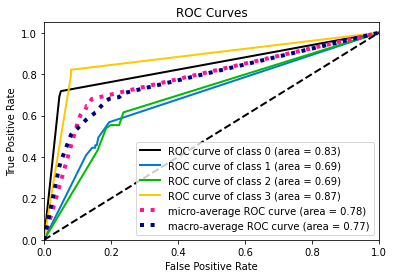

In [ ]:
tree = DecisionTreeClassifier(**best_params_tree)
tree.fit(X_train_pca, y_train_le)

predicted_proba = tree.predict_proba(X_test_pca)

scikitplot.metrics.plot_roc(y_test_le, predicted_proba);

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier

n_estimates = np.arange(2, 100, 5)
f1_scores = []
accuracy_s = []
for n_estimators in n_estimates:
  clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(**best_params_tree, random_state=0),
                          n_estimators=n_estimators, random_state=41).fit(X_train_pca, y_train_le)
  pred = clf.predict(X_test_pca)
  acc = accuracy_score(y_test_le, pred)
  f1 = f1_score(y_test_le, pred, average='weighted')
  f1_scores.append(f1)
  accuracy_s.append(acc)

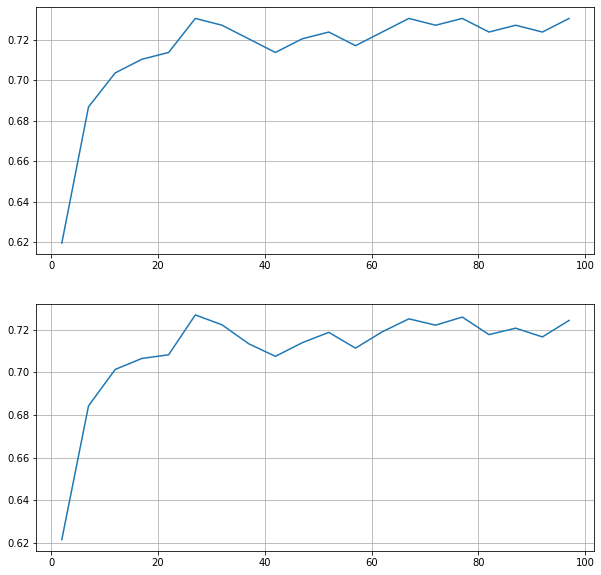

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(n_estimates, accuracy_s)
ax[0].grid()
ax[1].plot(n_estimates, f1_scores)
ax[1].grid()

Наилучшим выбором для деревьев решений будет взять 27 деревьев. Дальнейшее добавление деревьев будет переобучать модель. Параметры максимальной глубины вряд ли будут оптимальными, т.к. в алгоритме случайного леса нужно, чтобы деревья были как можно более непохожи друг на друга, а, следовательно, для этого не стоит их ограничивать. Проверим это далее...


In [ ]:
n_estimates = np.arange(2, 100, 5)
f1_scores = []
accuracy_s = []
for n_estimators in n_estimates:
  clf = BaggingClassifier(base_estimator=LogisticRegression(**best_params_logreg),
                          n_estimators=n_estimators).fit(X_train_pca, y_train_le)
  pred = clf.predict(X_test_pca)
  acc = accuracy_score(y_test_le, pred)
  f1 = f1_score(y_test_le, pred, average='weighted')
  f1_scores.append(f1)
  accuracy_s.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

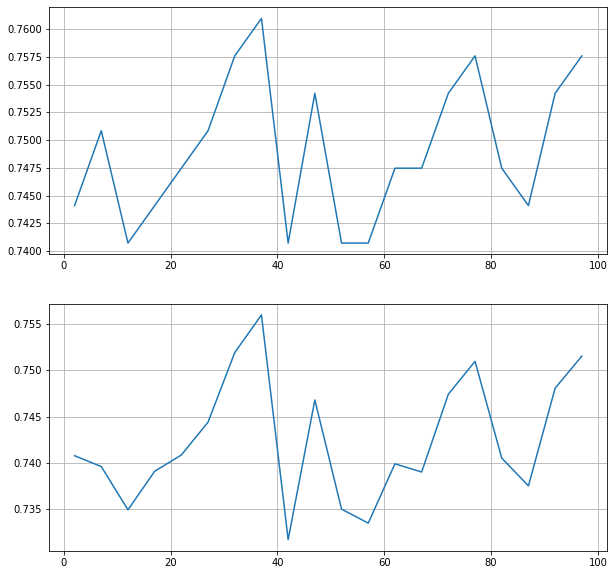

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(n_estimates, accuracy_s)
ax[0].grid()
ax[1].plot(n_estimates, f1_scores)
ax[1].grid()

Оптимальным будет выбрать 37 регрессии. Дальнейшее добавление будет приводить к переобучению

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimates = np.arange(2, 100, 5)
f1_scores = []
accuracy_s = []

for n_estimators in n_estimates:
  rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, **best_params_tree)
  rf.fit(X_train_pca, y_train_le)
  pred = rf.predict(X_test_pca)
  acc = accuracy_score(y_test_le, pred)
  f1 = f1_score(y_test_le, pred, average='weighted')
  f1_scores.append(f1)
  accuracy_s.append(acc)

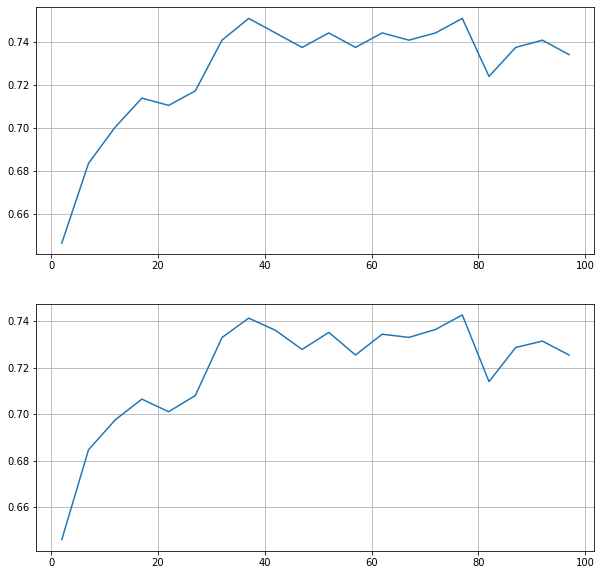

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(n_estimates, accuracy_s)
ax[0].grid()
ax[1].plot(n_estimates, f1_scores)
ax[1].grid()

Количество деревьев практически совпадает с тем, что мы делали при баггинге.

Проверим как работает случайный лес без подобранных гиперпараметров

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimates = np.arange(2, 100, 5)
f1_scores = []
accuracy_s = []

for n_estimators in n_estimates:
  rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
  rf.fit(X_train_pca, y_train_le)
  pred = rf.predict(X_test_pca)
  acc = accuracy_score(y_test_le, pred)
  f1 = f1_score(y_test_le, pred, average='weighted')
  f1_scores.append(f1)
  accuracy_s.append(acc)

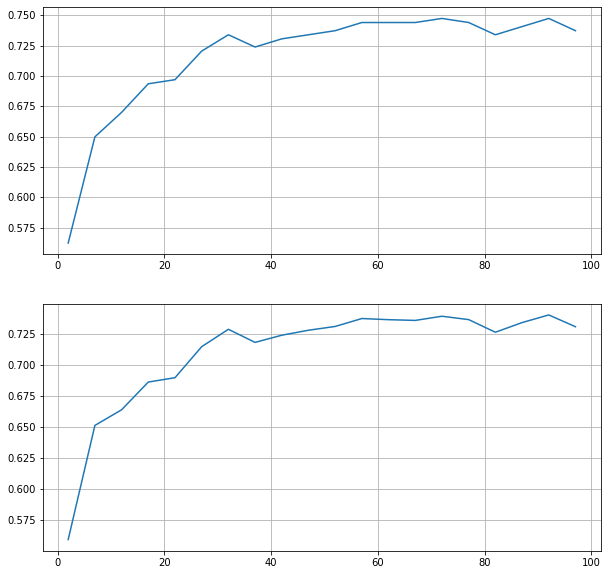

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(n_estimates, accuracy_s)
ax[0].grid()
ax[1].plot(n_estimates, f1_scores)
ax[1].grid()

Как видно из графиков, достаточно взять 27 дерева как и в случае логистической регрессии, и качество данного ансамбля будет чем у деревьев

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
def partitial_modeling(X_train, y_train, X_test, y_test, model, k):
  size = X_train.shape[0]
  window = int(size / k)
  idx = np.arange(size)
  scores = {'test_accuracy': [], 'test_f1_weighted': []}
  for i in range(k):
    clone_model = clone(model)
    if i != k-1:
      _idx = idx[:(i+1)*window]
    else:
      _idx = idx
    X = X_train[_idx]
    y = y_train[_idx]
    clone_model.fit(X, y)
    predict = clone_model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    f1 = f1_score(y_test, predict, average='weighted')
    scores['test_accuracy'].append(acc)
    scores['test_f1_weighted'].append(f1)
  return scores


def plot_scores(test_accuracy, test_f1_weighted):
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
  ax[0].plot(np.arange(len(test_accuracy)), test_accuracy)
  ax[0].grid()
  ax[1].plot(np.arange(len(test_f1_weighted)), test_f1_weighted)
  ax[1].grid()

Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


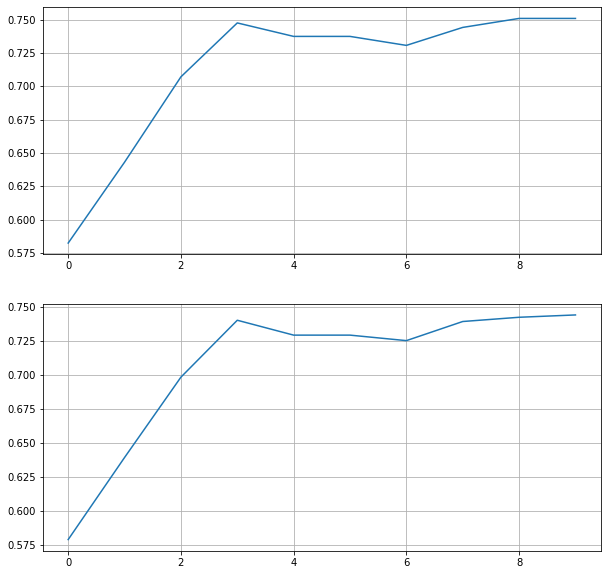

In [ ]:
logreg = LogisticRegression(**best_params_logreg)
score_dict = partitial_modeling(X_train_pca, y_train_le, X_test_pca, y_test_le, logreg, 10)
plot_scores(**score_dict)

Качество модели увеличивается с увеличением количества данных

Decision Tree

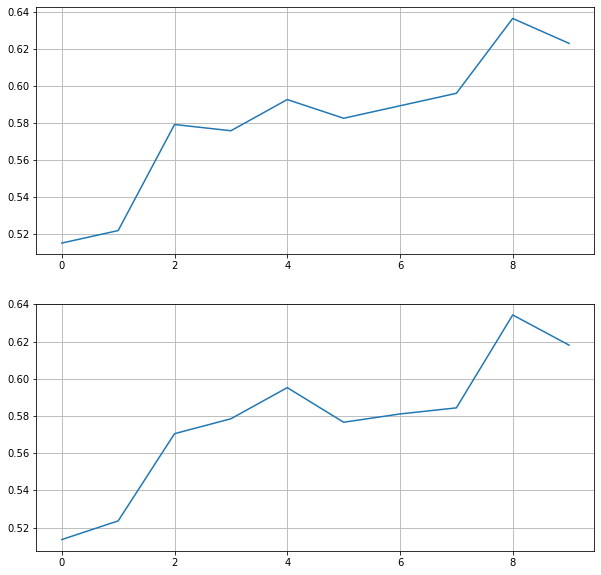

In [ ]:
tree = DecisionTreeClassifier(**best_params_tree)
score_dict = partitial_modeling(X_train_pca, y_train_le, X_test_pca, y_test_le, tree, 10)
plot_scores(**score_dict)

Дерево решений также показывает лучшее качество при большем количестве данных

Random Forest

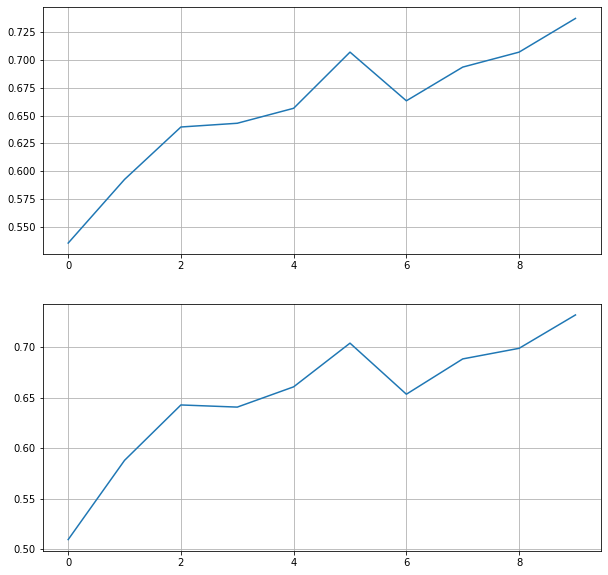

In [ ]:
rf = RandomForestClassifier(n_estimators=27, random_state=0)
score_dict = partitial_modeling(X_train_pca, y_train_le, X_test_pca, y_test_le, rf, 10)
plot_scores(**score_dict)

Судя по графику случайный лес может обучиться на 60% данных и дать результат немного уступающий тому, который был обучен на всех данных


# Общий вывод: 
мы видим, что при увеличении количества данных мы видим улучшение качества предсказания, но начная с примерно с 40-50% датасета прибавка к качеству перестаёт сильно расти. В целом это хорошая тенденция, показывающая, что мы можем аппроксимировать наши данные меньшим размером датасета